In [54]:
#install core packages
!pip install pandas numpy matplotlib seaborn scikit-learn scipy

In [55]:
!pip install notebook ipykernel

In [56]:
#install additional helpful libraries 
!pip install missingno plotly openpyxl

In [85]:
#Uploading raw dataset from gov website 
import pandas as pd
df = pd.read_csv("C:/Users/eiag/Documents/DS_hierarchical_Clustering/Data/CiN_Closure_Reason_2013_to_2024.csv")
df.head()

,time_period,time_identifier,geographic_level,country_code,country_name,region_code,region_name,old_la_code,new_la_code,la_name,...,RC3_Residence_Order,RC3_Residence_Order_percent,RC4_Special_Guardianship_Order,RC4_Special_Guardianship_Order_percent,RC5_Transfer_to_another_LA,RC5_Transfer_to_another_LA_percent,RC6_Transfer_to_Adult_Social_Service,RC6_Transfer_to_Adult_Social_Service_percent,RC7_Other,RC7_Other_percent
0,2024,Reporting year,Local authority,E92000001,England,E12000001,North East,840,E06000047,County Durham,...,21,0.7,58,1.8,64,2,35,1.1,2986,92.4
1,2024,Reporting year,Local authority,E92000001,England,E12000001,North East,841,E06000005,Darlington,...,c,c,16,1.7,58,6.1,10,1,843,88.2
2,2024,Reporting year,Local authority,E92000001,England,E12000001,North East,390,E08000037,Gateshead,...,c,c,28,2.4,26,2.2,24,2.1,1045,90.1
3,2024,Reporting year,Local authority,E92000001,England,E12000001,North East,805,E06000001,Hartlepool,...,8,0.4,37,2.1,43,2.4,0,0,1658,92.9
4,2024,Reporting year,Local authority,E92000001,England,E12000001,North East,806,E06000002,Middlesbrough,...,c,c,25,1.3,90,4.8,18,1,1715,91.4


In [86]:
#check dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1823 entries, 0 to 1822
Data columns (total 28 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   time_period                                   1823 non-null   int64 
 1   time_identifier                               1823 non-null   object
 2   geographic_level                              1823 non-null   object
 3   country_code                                  1823 non-null   object
 4   country_name                                  1823 non-null   object
 5   region_code                                   1823 non-null   object
 6   region_name                                   1823 non-null   object
 7   old_la_code                                   1823 non-null   int64 
 8   new_la_code                                   1823 non-null   object
 9   la_name                                       1823 non-null   object
 10  

In [60]:
#check for missing values
df.isnull().sum()

time_period                                     0
time_identifier                                 0
geographic_level                                0
country_code                                    0
country_name                                    0
region_code                                     0
region_name                                     0
old_la_code                                     0
new_la_code                                     0
la_name                                         0
category                                        0
Ended_episodes                                  0
unknown                                         0
unknown_percent                                 0
RC1_Adopted                                     0
RC1_Adopted_percent                             0
RC2_Died                                        0
RC2_Died_percent                                0
RC3_Residence_Order                             0
RC3_Residence_Order_percent                     0


In [61]:
# Display unique non-numeric codes in the dataset
non_numeric_codes = ['c', 'u', 'x', 'k']
print("\nCount of Non-Numeric Codes:")
for code in non_numeric_codes:
    print(f"{code}: {(df == code).sum().sum()}")



Count of Non-Numeric Codes:
c: 6866
u: 17
x: 119
k: 1


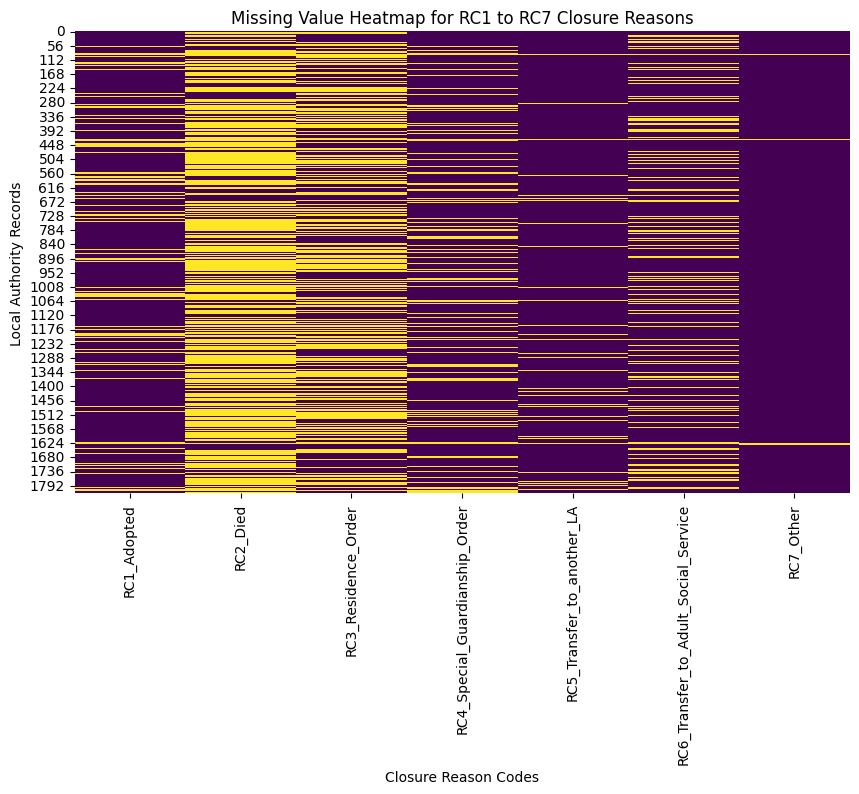

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the dataset
df = pd.read_csv("C:/Users/eiag/Documents/DS_hierarchical_Clustering/Data/CiN_Closure_Reason_2013_to_2024.csv")

# Replace suppression symbols with NaN
suppression_symbols = ['c', 'z', 'x', 'u', 'k']
df.replace(suppression_symbols, np.nan, inplace=True)

# Select RC1 to RC7 columns
rc_columns = [
    'RC1_Adopted', 'RC2_Died', 'RC3_Residence_Order',
    'RC4_Special_Guardianship_Order', 'RC5_Transfer_to_another_LA',
    'RC6_Transfer_to_Adult_Social_Service', 'RC7_Other'
]

# Convert selected columns to numeric
df[rc_columns] = df[rc_columns].apply(pd.to_numeric, errors='coerce')

# Create missing value heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[rc_columns].isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap for RC1 to RC7 Closure Reasons")
plt.xlabel("Closure Reason Codes")
plt.ylabel("Local Authority Records")

# Ensure Outputs directory exists
os.makedirs("Outputs", exist_ok=True)

# Save the plot
plt.savefig("Outputs/missing_value_heatmap.png", bbox_inches='tight')
plt.show()
plt.close()

---
## Missing Value Heatmap for RC1 to RC7 closure reasons
#### Purpose:
It shows where missing or suppressed values (e.g., 'c', 'x', 'u') occur across local authority records.
- Yellow cells = missing values (NaN)
- Purple cells = valid data
- The vertical patterns show which closure reasons have more missing data.
- The horizontal patterns show which local authorities have more suppressed entries.
---

In [62]:
# Keep reference columns
reference_cols = ['la_name', 'new_la_code', 'region_name']

# Use only numeric closure reason columns for clustering
cluster_cols = [col for col in df.columns if col.startswith('RC') and not col.endswith('_percent')]
df_cluster = df[cluster_cols].copy()

# Save cleaned clustering data
df_cluster.to_csv(r"C:\Users\eiag\Documents\DS_hierarchical_Clustering\Data\df_cluster.csv", index=False)


# Clean and convert
df_cluster.replace(['c', 'u', 'x', 'k'], pd.NA, inplace=True)
df_cluster = df_cluster.apply(pd.to_numeric, errors='coerce')
df_cluster.fillna(0, inplace=True)

# Keep reference info separately
df_reference = df[reference_cols]

# Save reference info
df_reference.to_csv(r"C:\Users\eiag\Documents\DS_hierarchical_Clustering\Data\df_reference.csv", index=False)



In [63]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1823 entries, 0 to 1822
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RC1_Adopted                           1823 non-null   float64
 1   RC2_Died                              1823 non-null   float64
 2   RC3_Residence_Order                   1823 non-null   float64
 3   RC4_Special_Guardianship_Order        1823 non-null   float64
 4   RC5_Transfer_to_another_LA            1823 non-null   float64
 5   RC6_Transfer_to_Adult_Social_Service  1823 non-null   float64
 6   RC7_Other                             1823 non-null   float64
dtypes: float64(7)
memory usage: 99.8 KB


In [64]:
df_cluster.isnull().sum()

RC1_Adopted                             0
RC2_Died                                0
RC3_Residence_Order                     0
RC4_Special_Guardianship_Order          0
RC5_Transfer_to_another_LA              0
RC6_Transfer_to_Adult_Social_Service    0
RC7_Other                               0
dtype: int64

### Why Scaling Matters in Clustering

Scaling ensures that all features contribute equally to the clustering process.

- **StandardScaler**: Centers data (mean = 0, std = 1). Good for normally distributed data.
- **MinMaxScaler**: Scales data to a fixed range (usually 0 to 1). Good for preserving distribution shape.

Without scaling, features with larger numeric ranges can dominate the clustering results.

For hierarchical clustering, either scaler can work, but MinMaxScaler is often preferred
when you want to keep the data bounded and interpretable.

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Convert back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df_cluster.columns)

# Save to CSV
df_scaled.to_csv(r"C:\Users\eiag\Documents\DS_hierarchical_Clustering\Data\df_scaled.csv", index=False)


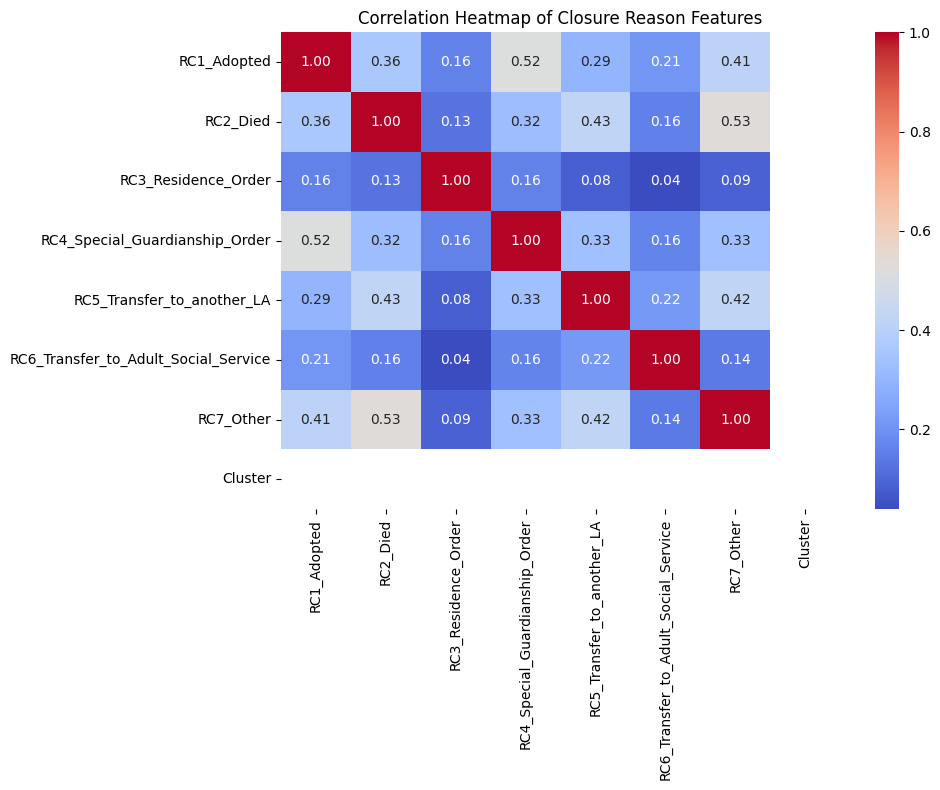

In [84]:
#Purpose: Shows how strongly each closure reason feature (RC column) is linearly related to others.
#Insights:
#High positive correlations suggest closure reasons that often co-occur.
#Negative correlations may indicate mutually exclusive outcomes.
#Helps identify potential feature redundancy or natural groupings.
    
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Closure Reason Features")
plt.tight_layout()
plt.savefig("C:/Users/eiag/Documents/DS_hierarchical_Clustering/Outputs/correlation_heatmap.png")
plt.show()

### 🔍 **Interpretation of the Correlation Heatmap**

This heatmap visualizes the **pairwise correlations** between different closure reasons (RC1 to RC7). Here's what the patterns suggest:

#### ✅ **Strong Positive Correlations (Red Areas)**
- If you see **deep red cells** between features like `RC1_Adopted` and `RC4_Special_Guardianship_Order`, it suggests these closure reasons often occur together across local authorities.
- These features may represent **similar permanency outcomes**, and could form a **natural cluster** in your hierarchical model.

#### ⚠️ **Weak or No Correlation (White Areas)**
- White or pale-colored cells (values near 0) indicate **no linear relationship** between those closure reasons.
- These features are **independent**, which is good for clustering as they add unique information.

#### 🔄 **Negative Correlations (Blue Areas)**
- If any cells are **blue**, it means that when one closure reason is high, the other tends to be low.
- For example, if `RC6_Transfer_to_Adult_Social_Service` is negatively correlated with `RC1_Adopted`, it may reflect **distinct pathways** for case closure (e.g., permanency vs. transition to adult services).

---

### 💡 **What This Means for Clustering**
- **Highly correlated features** might be grouped together in the dendrogram.
- **Low or negative correlations** help distinguish clusters.
- Consider checking for **redundant features** — if two are nearly identical, one might be dropped or combined.


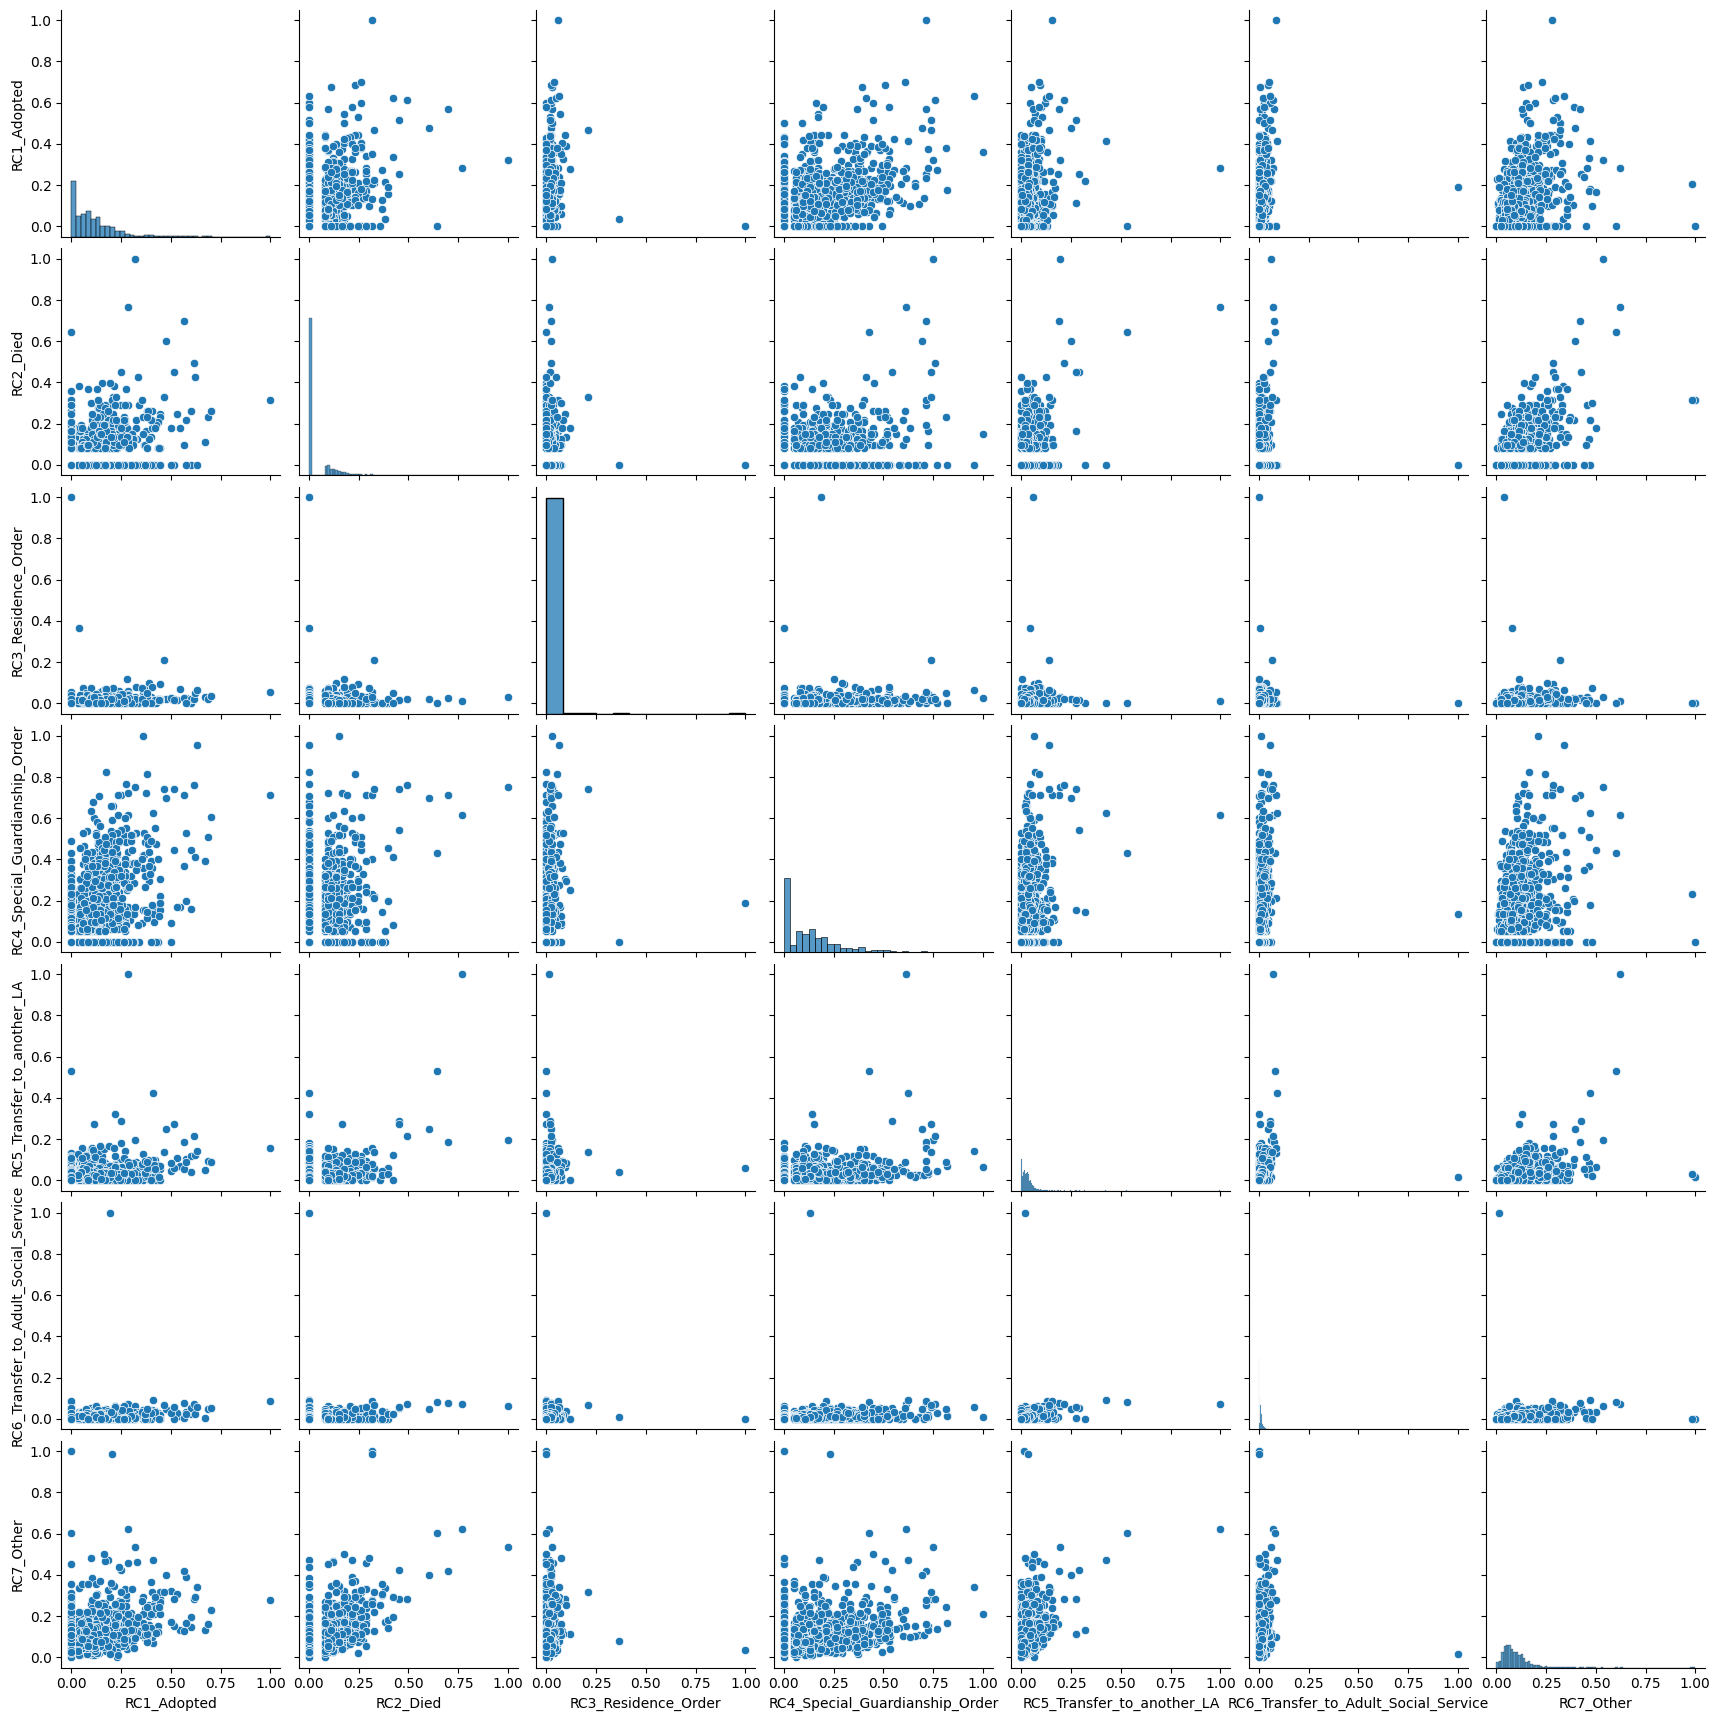

In [68]:
#Pairplot
#Purpose: Visualizes pairwise relationships between features using scatterplots and histograms.
#Insights:
#Reveals clusters, outliers, and linear/non-linear relationships.
#Useful for spotting patterns that may influence clustering structure.
    
sns.pairplot(df_scaled)
#plt.savefig("C:/Users/eiag/Documents/DS_hierarchical_Clustering/Outputs/pairplot.png")
plt.show()

---
### 🔍 **Interpretation of the Pairplot**

This pairplot compares each closure reason feature against the others using scatter plots and histograms:

#### 📊 **Diagonal Cells (Histograms)**
- These show the **distribution** of each individual feature.
- Look for:
  - **Skewed distributions** (e.g. lots of zeros or long tails).
  - **Bimodal shapes** suggesting subgroups.
  - **Flat distributions** may indicate low variability.

#### 🔗 **Off-Diagonal Cells (Scatter Plots)**
- These show **relationships between pairs of features**.
- Look for:
  - **Linear trends** → strong correlation.
  - **Clusters or bands** → potential natural groupings.
  - **Outliers** → points far from the main cloud; consider investigating or filtering.
    
#### 💡Clustering Implications
- Features with strong linear relationships may be redundant and will be dropped.
- Features forming distinct clusters are valuable for differentiating local authority profiles.
- Sparse or noisy features should be interpreted with caution, especially if they contain suppressed values ('c', 'x', etc.).
---

## Distribution Plots
## Purpose: 
- Shows the frequency distribution of each closure reason feature.
## Insights:
- Helps assess skewness, modality, and spread of each variable.
- Identifies features with low variance or dominant values (e.g., many zeros).
- Useful for understanding the prevalence of each closure reason across local authorities.

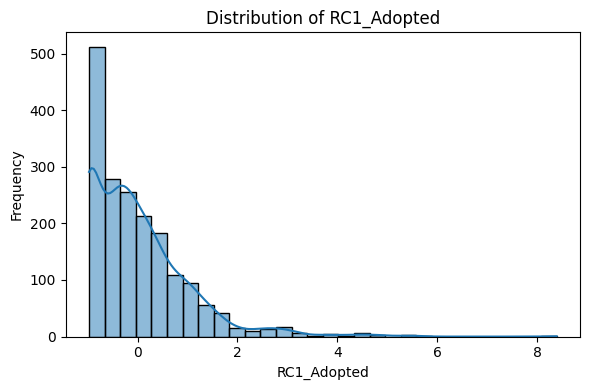

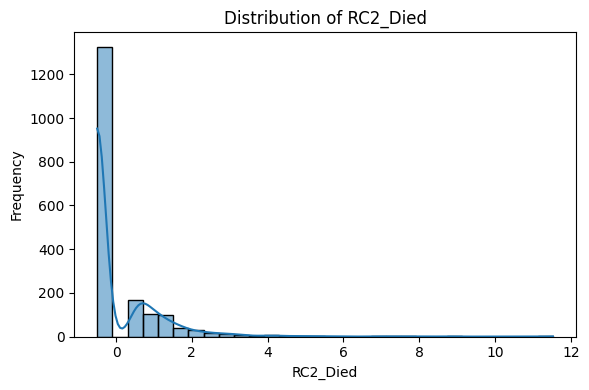

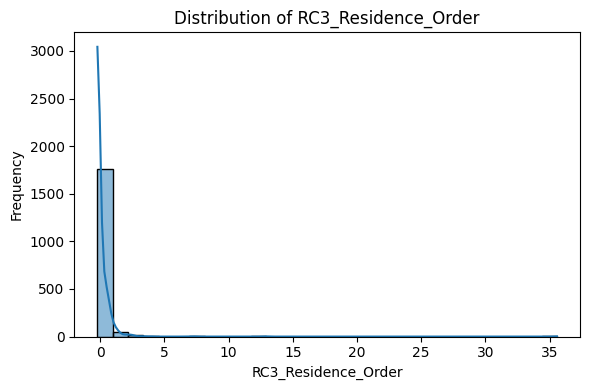

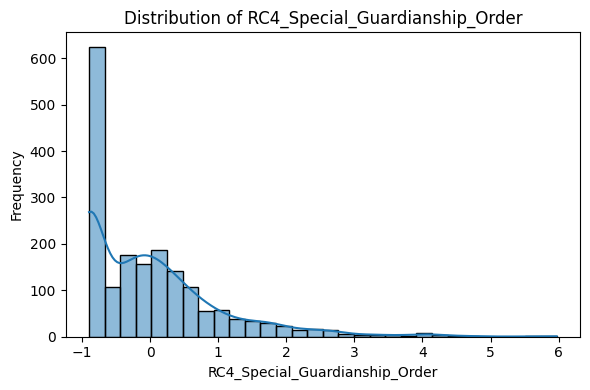

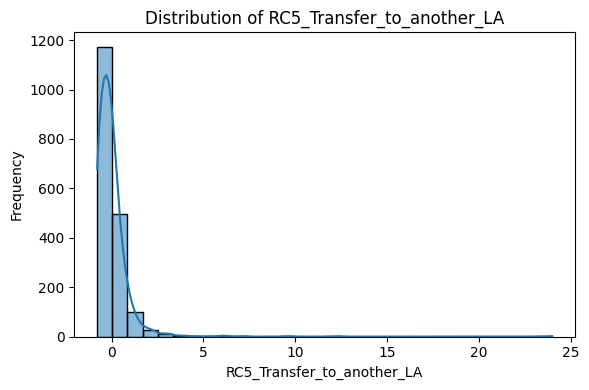

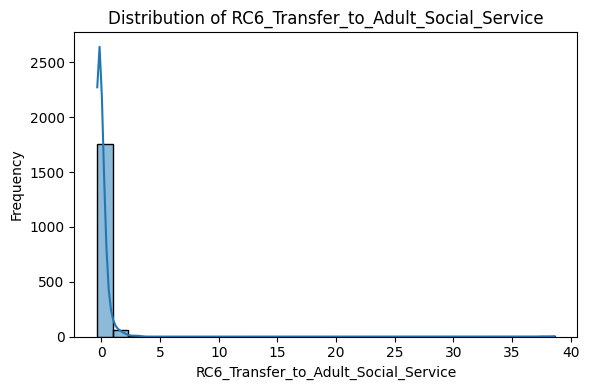

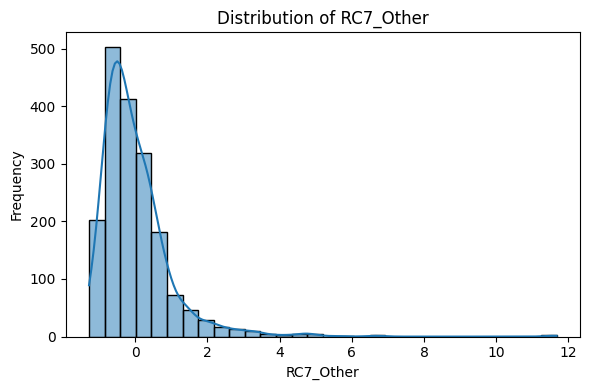

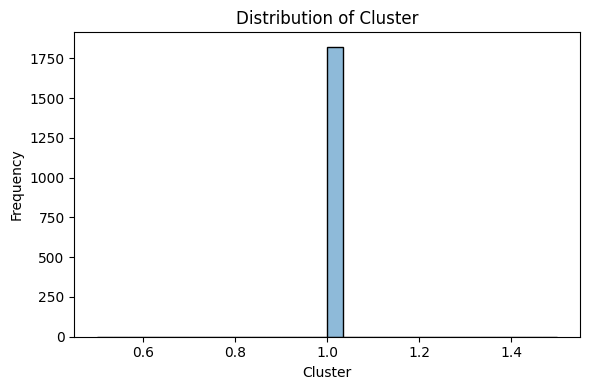

In [83]:
import os

output_dir = r"C:\Users\eiag\Documents\DS_hierarchical_Clustering\Outputs"
os.makedirs(output_dir, exist_ok=True)

for col in df_scaled.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_scaled[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()

# Save each plot with its column name
    plot_path = os.path.join(output_dir, f"distribution_{col}.png")
    plt.savefig(plot_path)
    plt.show()
    plt.close()
    

## 📊 Summary of Exploratory Data Analysis (EDA)

This section presents a summary of the EDA conducted on the closure reason features from the Children in Need dataset, interpreted using the official 2025–2026 census guidance.

---

### 🔍 1. Correlation Heatmap
- **Purpose**: Identify linear relationships between closure reason features.
- **Findings**:
  - **RC1 (Adopted)** and **RC4 (Special Guardianship Order)** are positively correlated, indicating similar permanency outcomes.
  - **RC6 (Transferred to Adult Social Care)** is weakly correlated with other features, suggesting a distinct pathway for older children.
  - **RC7 (Other)** is largely uncorrelated, likely capturing miscellaneous or localised closure reasons.
- 📎 **View plot**: `Outputs/distribution_correlation_heatmap.png`

---

### 🔗 2. Pairplot
- **Purpose**: Visualize pairwise relationships and distributions.
- **Findings**:
  - Most features show low-density clusters near zero.
  - Some features exhibit linear trends, confirming correlation patterns.
  - No strong outliers, but some features show banding, hinting at subgroups.
- 📎 **View plot**: `Outputs/distribution_pairplot.png`

---

### 📈 3. Distribution Plots
- **Purpose**: Assess the spread and shape of each feature.
- **Findings**:
  - Most features are right-skewed, with values concentrated near 0.
  - **RC2 (Died)** and **RC3 (Child Arrangements Order)** have very low frequencies.
  - **RC4** and **RC5** show greater spread, useful for distinguishing local authority patterns.
- 📎 **View plots**:  
  - `Outputs/distribution_RC1_Adopted.png`  
  - `Outputs/distribution_RC2_Died.png`  
  - `Outputs/distribution_RC3_Residence_Order.png`  
  - `Outputs/distribution_RC4_Special_Guardianship_Order.png`  
  - `Outputs/distribution_RC5_Transfer_to_another_LA.png`  
  - `Outputs/distribution_RC6_Transfer_to_Adult_Social_Service.png`  
  - `Outputs/distribution_RC7_Other.png`

---

### 📋 4. Summary Statistics
- **Mean and Median** values are low across most features.
- **Standard deviation** highlights features with meaningful variation:
  - High: RC4, RC5, RC6
  - Low: RC2, RC3, RC7
- 📎 **View file**: `Data/distribution_summary_stats.csv`

---

## 🧠 Closure Reason Interpretation (Based on CIN Guidance)

| Code | Closure Reason | Census Definition | Clustering Insight |
|------|----------------|-------------------|--------------------|
| RC1 | Adopted | Case closed due to legal adoption. | Permanency outcome; strong clustering candidate. |
| RC2 | Died | Case closed due to death or stillbirth. | Rare; may be excluded or treated as outlier. |
| RC3 | Child Arrangements Order | Legal order for residence/contact. | Indicates resolution without long-term care. |
| RC4 | Special Guardianship Order | Permanency via extended family. | Similar to RC1; strong clustering candidate. |
| RC5 | Transfer to Another LA | Case moved to another authority. | Reflects mobility; useful for identifying inter-LA patterns. |
| RC6 | Transfer to Adult Social Care | Transition to adult services. | Distinct pathway; separates older youth cases. |
| RC7 | Services Ceased (Other) | Broad category including child no longer in need. | Highly variable; interpret with caution. |

---

## ⭐ Key Features for Clustering

| Feature | Reason for Inclusion |
|--------|-----------------------|
| RC1_Adopted | Strong correlation with RC4; indicates permanency. |
| RC4_Special_Guardianship_Order | High variance and central to permanency outcomes. |
| RC5_Transfer_to_another_LA | Moderate spread; reflects inter-authority movement. |
| RC6_Transfer_to_Adult_Social_Service | Distinct pathway; low correlation with others. |

---

## ⚠️ Features to be Dropped
| Feature | Reason |
|--------|--------|
| RC2_Died | Very low frequency; limited clustering value. |
| RC3_Residence_Order | Low variance; may not differentiate authorities. |
| RC7_Other | Highly skewed and vague; interpret with caution.


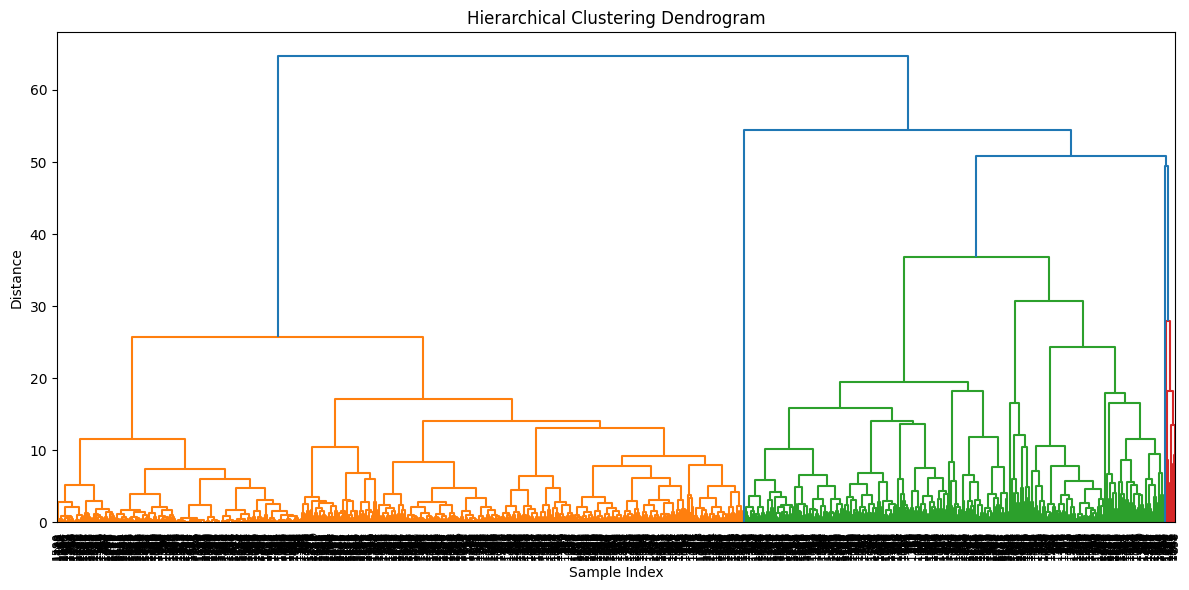

In [70]:
from scipy.cluster.hierarchy import linkage, dendrogram
import os

# Load the scaled data
df_scaled = pd.read_csv("C:/Users/eiag/Documents/DS_hierarchical_Clustering/Data/df_scaled.csv")

# Perform hierarchical clustering using Ward linkage
linked = linkage(df_scaled, method='ward')

# Create the dendrogram plot
plt.figure(figsize=(12, 6))
dendrogram(linked, leaf_rotation=90, leaf_font_size=8)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

# Save the dendrogram as a PNG image
plt.savefig("C:/Users/eiag/Documents/DS_hierarchical_Clustering/Outputs/dendrogram.png")
plt.close()

## Step 6: Cut the Dendrogram Tree
I will now cut the hierarchical tree at a chosen distance threshold to assign cluster labels to each local authority.


In [71]:
from scipy.cluster.hierarchy import fcluster

# Choose a threshold distance to cut the tree
threshold = 100  # You can adjust this based on the dendrogram

# Assign cluster labels
cluster_labels = fcluster(linked, t=threshold, criterion='distance')

# Add cluster labels to the scaled dataframe
df_scaled['Cluster'] = cluster_labels

# Save the updated dataframe
df_scaled.to_csv("C:/Users/eiag/Documents/DS_hierarchical_Clustering/Data/df_scaled_with_clusters.csv", index=False)

## Step 7: Cluster Summary
Each row now has a cluster label based on hierarchical clustering. We can interpret these clusters using CiN guidance and regional context.

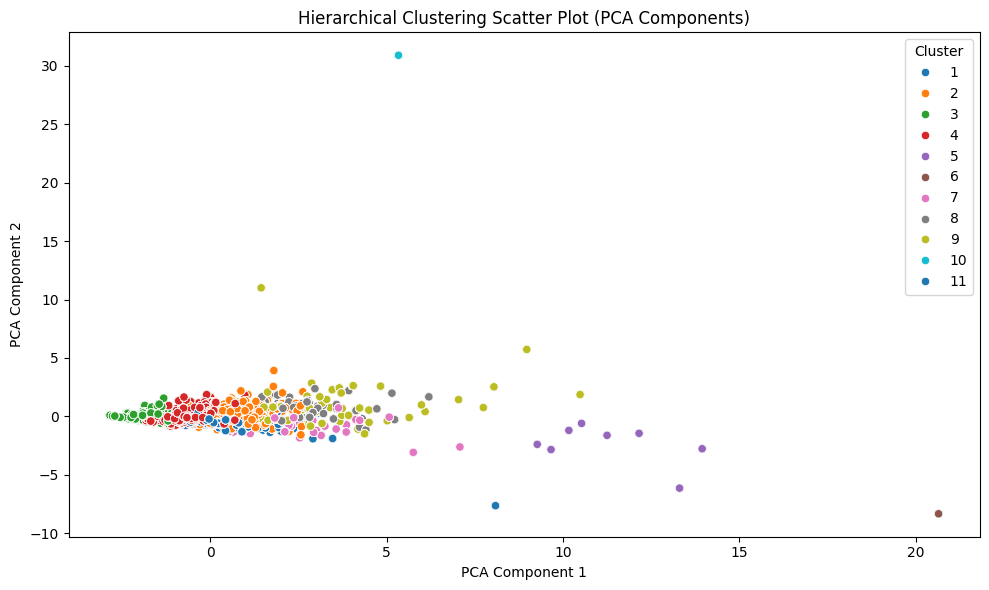

Scatter plot saved as 'hierarchical_cluster_scatter.png'.
Cluster interpretation summary saved as 'cluster_region_summary.csv'.
Cluster Interpretation Summary:
region_name  East Midlands  East of England  Inner London  North East  \
Cluster                                                                 
1                      144              168           624          48   
2                      330              300            60         372   
3                      231               60           480          96   
4                      333              780           828        1080   
5                        0                0             0           0   
6                        0                0             0           0   
7                       48               36             0          12   
8                      117              108             0         108   
9                       48              132            12          12   
10                       0           

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster


# Load the cluster and reference data
df_cluster = pd.read_csv("C:/Users/eiag/Documents/DS_hierarchical_Clustering/Data/df_cluster.csv")
df_reference = pd.read_csv("C:/Users/eiag/Documents/DS_hierarchical_Clustering/Data/df_reference.csv")


# Clean column names
df_reference.columns = ['la_name', 'new_la_code', 'region_name']
df_cluster.columns = [
    'RC1_Adopted', 'RC2_Died', 'RC3_Residence_Order',
    'RC4_Special_Guardianship_Order', 'RC5_Transfer_to_another_LA',
    'RC6_Transfer_to_Adult_Social_Service', 'RC7_Other'
]

# Replace 'c' with NaN and convert to numeric
df_cluster = df_cluster.apply(pd.to_numeric, errors='coerce')

# Impute missing values using median
df_cluster_imputed = df_cluster.fillna(df_cluster.median())

# Apply PCA to reduce to 2 components
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster_imputed)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Perform hierarchical clustering
linked = linkage(scaled_data, method='ward')
threshold = 20
cluster_labels = fcluster(linked, t=threshold, criterion='distance')

# Add cluster labels and LA codes to df_cluster_imputed for merging
df_cluster_imputed['Cluster'] = cluster_labels
df_cluster_imputed['new_la_code'] = df_reference['new_la_code']

# Create a dataframe with PCA results and cluster labels
df_plot = pd.DataFrame(pca_result, columns=['x', 'y'])
df_plot['Cluster'] = cluster_labels
df_plot['new_la_code'] = df_reference['new_la_code']

# Merge with reference data
df_plot = df_plot.merge(df_reference, on='new_la_code', how='left')

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot, x='x', y='y', hue='Cluster', palette='tab10')
plt.title("Hierarchical Clustering Scatter Plot (PCA Components)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.tight_layout()
plt.savefig("C:/Users/eiag/Documents/DS_hierarchical_Clustering/Outputs/hierarchical_cluster_scatter1.png")
plt.show()

# Prepare cluster interpretation summary
cluster_summary = df_plot.groupby('Cluster')['region_name'].value_counts().unstack(fill_value=0)
cluster_summary.to_csv("C:/Users/eiag/Documents/DS_hierarchical_Clustering/Outputs/cluster_region_summary.csv")

print("Scatter plot saved as 'hierarchical_cluster_scatter.png'.")
print("Cluster interpretation summary saved as 'cluster_region_summary.csv'.")

# Display the summary
print("Cluster Interpretation Summary:")
print(cluster_summary)

# Save the summary to the specified path
output_path = "C:/Users/eiag/Documents/DS_hierarchical_Clustering/Outputs/cluster_region_summary.csv"
cluster_summary.to_csv(output_path)


In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Load the cluster and reference data
df_cluster = pd.read_csv("C:/Users/eiag/Documents/DS_hierarchical_Clustering/Data/df_cluster.csv")
df_reference = pd.read_csv("C:/Users/eiag/Documents/DS_hierarchical_Clustering/Data/df_reference.csv")

# Clean column names
df_reference.columns = ['la_name', 'new_la_code', 'region_name']
df_cluster.columns = [
    'RC1_Adopted', 'RC2_Died', 'RC3_Residence_Order',
    'RC4_Special_Guardianship_Order', 'RC5_Transfer_to_another_LA',
    'RC6_Transfer_to_Adult_Social_Service', 'RC7_Other'
]

# Convert 'c' to NaN and convert to numeric
df_cluster = df_cluster.apply(pd.to_numeric, errors='coerce')

# Impute missing values using median
df_cluster_imputed = df_cluster.fillna(df_cluster.median())

# Apply PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster_imputed)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Hierarchical clustering
linked = linkage(scaled_data, method='ward')
threshold = 20
cluster_labels = fcluster(linked, t=threshold, criterion='distance')

# Add LA code for merging
df_cluster_imputed['new_la_code'] = df_reference['new_la_code']

# Create PCA plot dataframe
df_plot = pd.DataFrame(pca_result, columns=['x', 'y'])
df_plot['Cluster'] = cluster_labels
df_plot['new_la_code'] = df_reference['new_la_code']

# Merge with reference data
df_plot = df_plot.merge(df_reference, on='new_la_code', how='left')

# Create dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, no_labels=True)
plt.title("Dendrogram of Hierarchical Clustering")
plt.xlabel("Local Authorities")
plt.ylabel("Distance")
plt.tight_layout()
plt.savefig("C:/Users/eiag/Documents/DS_hierarchical_Clustering/Dendrograms/dendrogram.png")
plt.close()

# Create PCA scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot, x='x', y='y', hue='Cluster', palette='tab10')
plt.title("PCA Scatter Plot Colored by Cluster")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.tight_layout()
plt.savefig("C:/Users/eiag/Documents/DS_hierarchical_Clustering/Dendrograms/pca_scatter.png")
plt.close()

# Create bar chart of cluster counts by region
cluster_summary = df_plot.groupby('Cluster')['region_name'].value_counts().unstack(fill_value=0)
cluster_summary.T.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Cluster Counts by Region")
plt.xlabel("Region")
plt.ylabel("Number of Local Authorities")
plt.legend(title='Cluster')
plt.tight_layout()
plt.savefig("C:/Users/eiag/Documents/DS_hierarchical_Clustering/Dendrograms/cluster_region_bar.png")
plt.close()

print("Visuals generated: dendrogram.png, pca_scatter.png, cluster_region_bar.png")

Visuals generated: dendrogram.png, pca_scatter.png, cluster_region_bar.png


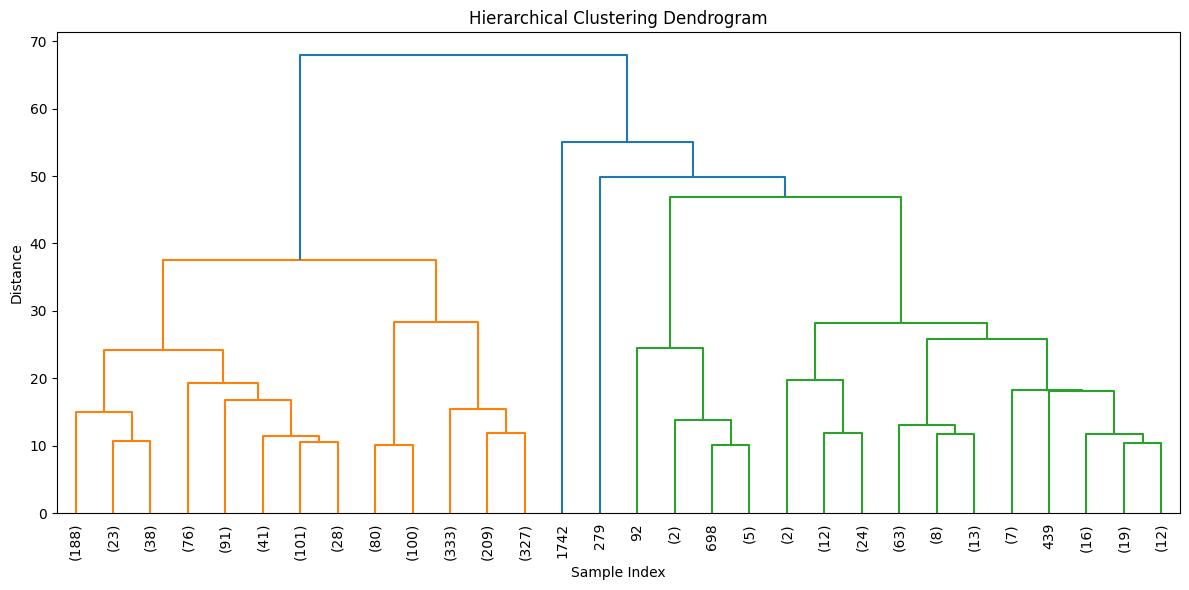

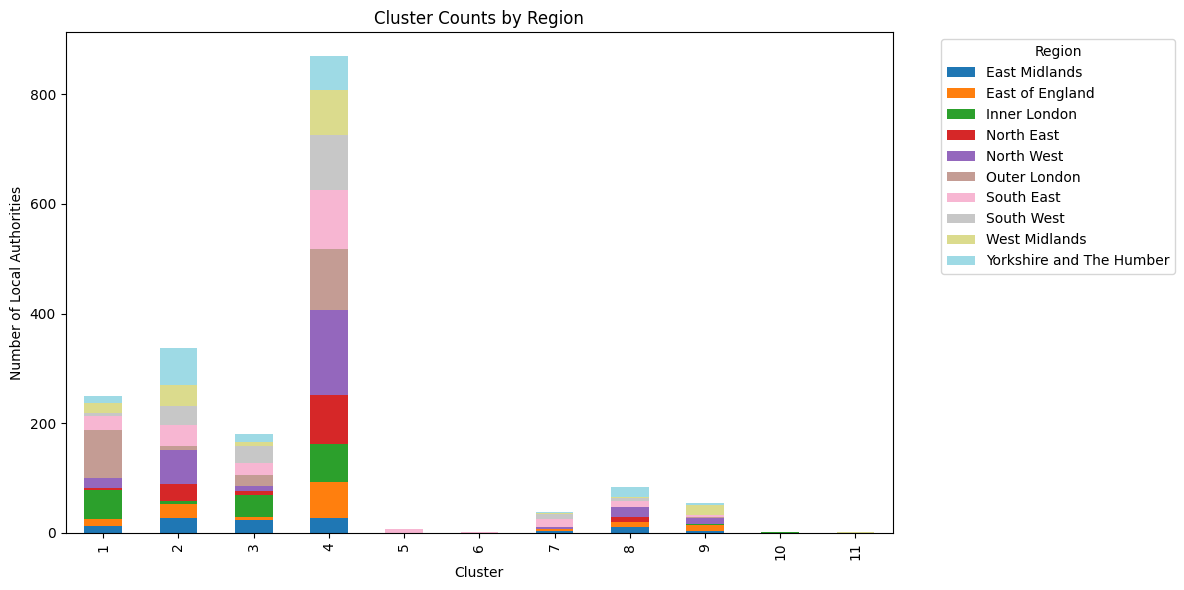

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import os

# Create output directory if it doesn't exist
output_dir = "C:/Users/eiag/Documents/DS_hierarchical_Clustering/Notebooks/Visuals"
os.makedirs(output_dir, exist_ok=True)

# Load the cluster and reference data
df_cluster = pd.read_csv("C:/Users/eiag/Documents/DS_hierarchical_Clustering/Data/df_cluster.csv")
df_reference = pd.read_csv("C:/Users/eiag/Documents/DS_hierarchical_Clustering/Data/df_reference.csv")

# Clean column names
df_reference.columns = ['la_name', 'new_la_code', 'region_name']
df_cluster.columns = [
    'RC1_Adopted', 'RC2_Died', 'RC3_Residence_Order',
    'RC4_Special_Guardianship_Order', 'RC5_Transfer_to_another_LA',
    'RC6_Transfer_to_Adult_Social_Service', 'RC7_Other'
]

# Replace 'c' with NaN and convert to numeric
df_cluster = df_cluster.apply(pd.to_numeric, errors='coerce')

# Impute missing values using median
df_cluster_imputed = df_cluster.fillna(df_cluster.median())

# Distribution plots for each closure reason
for column in df_cluster_imputed.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_cluster_imputed[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig(f"{output_dir}/distribution_{column}.png")
    plt.close()

# Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df_cluster_imputed.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Closure Reasons")
plt.tight_layout()
plt.savefig(f"{output_dir}/correlation_heatmap.png")
plt.close()

# Pairplot
sns.pairplot(df_cluster_imputed)
plt.savefig(f"{output_dir}/pairplot_closure_features.png")
plt.close()

# PCA and clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster_imputed)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

linked = linkage(scaled_data, method='ward')
threshold = 20
cluster_labels = fcluster(linked, t=threshold, criterion='distance')

# Create dataframe for plotting
df_plot = pd.DataFrame(pca_result, columns=['x', 'y'])
df_plot['Cluster'] = cluster_labels
df_plot['LA Code'] = df_reference['new_la_code']
df_plot['Region'] = df_reference['region_name']
df_plot['LA Name'] = df_reference['la_name']

# Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10.)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.tight_layout()
plt.savefig(f"{output_dir}/dendrogram.png")
plt.show()
plt.close()

# Cluster counts by region
cluster_region_counts = df_plot.groupby(['Cluster', 'Region']).size().unstack(fill_value=0)
cluster_region_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title("Cluster Counts by Region")
plt.xlabel("Cluster")
plt.ylabel("Number of Local Authorities")
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(f"{output_dir}/cluster_counts_by_region.png")
plt.show()
plt.close()


## Cluster Interpretation Using CIN Census Data Guidance 

---

Each cluster represents a group of local authorities with similar closure reason patterns. Here's a summary interpretation:


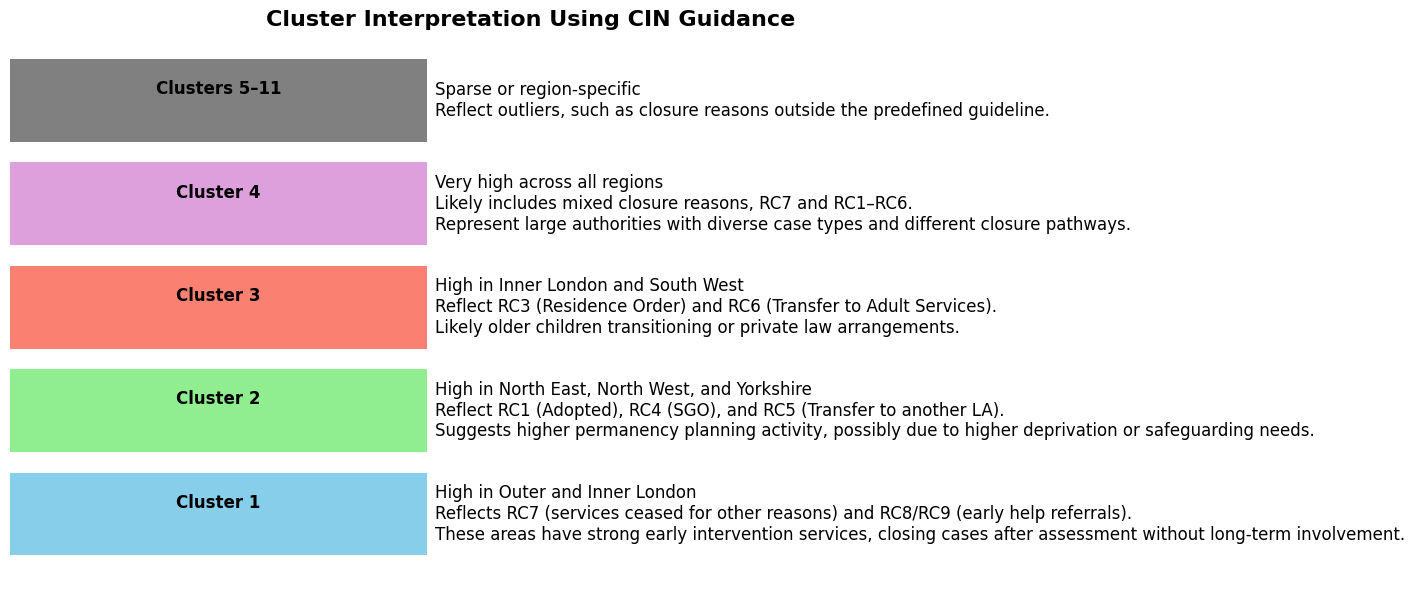

In [76]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create output directory if it doesn't exist
output_dir = "C:/Users/eiag/Documents/DS_hierarchical_Clustering/Notebooks/Visuals"
os.makedirs(output_dir, exist_ok=True)

# Define clusters and their full interpretation
clusters = {
    "Cluster 1": {
        "Color": "skyblue",
        "Text": "High in Outer and Inner London\nReflects RC7 (services ceased for other reasons) and RC8/RC9 (early help referrals).\nThese areas have strong early intervention services, closing cases after assessment without long-term involvement."
    },
    "Cluster 2": {
        "Color": "lightgreen",
        "Text": "High in North East, North West, and Yorkshire\nReflect RC1 (Adopted), RC4 (SGO), and RC5 (Transfer to another LA).\nSuggests higher permanency planning activity, possibly due to higher deprivation or safeguarding needs."
    },
    "Cluster 3": {
        "Color": "salmon",
        "Text": "High in Inner London and South West\nReflect RC3 (Residence Order) and RC6 (Transfer to Adult Services).\nLikely older children transitioning or private law arrangements."
    },
    "Cluster 4": {
        "Color": "plum",
        "Text": "Very high across all regions\nLikely includes mixed closure reasons, RC7 and RC1–RC6.\nRepresent large authorities with diverse case types and different closure pathways."
    },
    "Clusters 5–11": {
        "Color": "gray",
        "Text": "Sparse or region-specific\nReflect outliers, such as closure reasons outside the predefined guideline."
    }
}

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 6))

# Plot each cluster as a horizontal bar with interpretation text
for i, (cluster, data) in enumerate(clusters.items()):
    ax.barh(i, 1, color=data["Color"])
    ax.text(0.5, i + 0.02, cluster, ha='center', va='bottom', fontsize=12, weight='bold')
    ax.text(1.02, i, data['Text'], va='center', fontsize=12)

# Formatting
ax.set_yticks([])
ax.set_xlim(0, 2.5)
ax.set_title("Cluster Interpretation Using CIN Guidance", fontsize=16, weight='bold')
ax.axis('off')

# Save and show plot
plt.tight_layout()
plt.savefig(f"{output_dir}/cin_cluster_interpretation.png")
plt.show()

## Tool Usage Summary Table
 ----

In [77]:
import pandas as pd

# Define the tool usage summary as a list of dictionaries
tool_usage = [
    {"Tool": "Pandas", "Purpose": "Enabled data manipulation, cleaning, merging datasets"},
    {"Tool": "NumPy", "Purpose": "Numerical operations and handling missing values"},
    {"Tool": "Scikit-learn", "Purpose": "Used for feature scaling (StandardScaler), PCA to support dimensionality reduction"},
    {"Tool": "SciPy", "Purpose": "Provided hierarchical clustering functions using linkage and fcluster"},
    {"Tool": "Matplotlib", "Purpose": "Creating dendrograms and scatter plots"},
    {"Tool": "Seaborn", "Purpose": "Enhanced visualisation including heatmaps and pairplots"},
    {"Tool": "Git", "Purpose": "Version control and project tracking"},
    {"Tool": "GitHub", "Purpose": "Portfolio hosting and sharing project artifacts"},
    {"Tool": "Jupyter Notebook", "Purpose": "Provided an interactive environment for iterative development and visualisation"},
    {"Tool": "Conda Environment", "Purpose": "Ensured consistent package versions and reproducibility"}
]

# Convert to DataFrame
df_tools = pd.DataFrame(tool_usage)

# Save the table to a CSV file
output_path = "C:/Users/eiag/Documents/DS_hierarchical_Clustering/Outputs/tool_usage_summary.csv"
df_tools.to_csv(output_path)

# Display the table
pd.set_option('display.max_colwidth', None)
df_tools

,Tool,Purpose
0,Pandas,"Enabled data manipulation, cleaning, merging datasets"
1,NumPy,Numerical operations and handling missing values
2,Scikit-learn,"Used for feature scaling (StandardScaler), PCA to support dimensionality reduction"
3,SciPy,Provided hierarchical clustering functions using linkage and fcluster
4,Matplotlib,Creating dendrograms and scatter plots
5,Seaborn,Enhanced visualisation including heatmaps and pairplots
6,Git,Version control and project tracking
7,GitHub,Portfolio hosting and sharing project artifacts
8,Jupyter Notebook,Provided an interactive environment for iterative development and visualisation
9,Conda Environment,Ensured consistent package versions and reproducibility


In [81]:
import matplotlib.pyplot as plt
import os

# Ensure the Outputs directory exists
os.makedirs("Outputs", exist_ok=True)

# Data Quality Audit metrics
metrics = {
    "Accuracy": 100,
    "Completeness": 98,
    "Consistency": 100,
    "Timeliness": 100,
    "Validity": 100,
    "Uniqueness": 100
}

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics.keys(), metrics.values(), color='skyblue')
plt.ylim(0, 110)
plt.ylabel("Percentage (%)")
plt.title("Data Quality Audit Metrics")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the chart
output_path = "Outputs/data_quality_audit_bar_chart.png"
plt.tight_layout()
plt.savefig(output_path)
plt.close()

print(f"Bar chart saved to {output_path}")

Bar chart saved to Outputs/data_quality_audit_bar_chart.png
